In [2]:
# Numeric
import numpy as np
import pandas as pd

# Tools
import os, sys
import re
import string
import csv
import string
import datetime
from datetime import datetime

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

import src.utils_variable as utils
%matplotlib inline

In [25]:
df = pd.read_csv("csv_files/satelliteData.csv")
df = df[ (df["folder"] == "optimal") & (df["GRA"] == 1) & (df["pixelBurned"] > 0)]
df.head()

,EMSR,AOI,folder,folderPath,activationDate,interval_startDate,interval_endDate,post_fire_acquisition,GRA,DEL,...,centerBoxLong,centerBoxLat,resolution_x,resolution_y,height,width,pixelBurned,country,koppen_group,koppen_subgroup
0,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_01,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,-8.270614,39.826832,0.000118,-0.000089,1442,1977,901978,Portugal,C,Csa
1,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_04,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,-8.038238,39.826832,0.000118,-0.000089,1448,1973,2629,Portugal,C,Csa
2,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_08,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,-7.805862,39.955332,0.000118,-0.000088,1453,1966,60675,Portugal,C,Csb
3,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_05,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,-8.038238,39.955332,0.000118,-0.000089,1448,1970,652165,Portugal,C,Csa
4,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_06,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,-8.038238,40.083832,0.000118,-0.000089,1448,1966,981581,Portugal,C,Csb


# Cloud coverage statistics

In [3]:
df = pd.read_csv(utils.cloudCoveragecsv)
df = df[ (df["folderPath"].str.contains("smoke") == False) & \
         (df["folderPath"].str.contains("cloudy/") == False) & \
         (df["folderPath"].str.contains("cloudyClean/") == False)
        ]
df_clean = df.drop(columns= ["folderPath", "startDate", "endDate"])
df_clean.head()

,EMSR_AOI,height,width,sizeImage,burnedPixel,cloudPixel,countOverlap,percentageCloud,percentageOverlap,Type
0,EMSR443_AOI01_01,873,546,476658,228801,0,0,0.00,0.0,GRA
1,EMSR443_AOI01_01,873,546,476658,228801,0,0,0.00,0.0,DEL
2,EMSR230_AOI01_01,580,589,341620,45445,0,0,0.00,0.0,GRA
3,EMSR230_AOI01_01,580,589,341620,45445,0,0,0.00,0.0,DEL
4,EMSR250_AOI01_03,1448,1127,1631896,17250,242,0,0.01,0.0,GRA


In [4]:
df_GRA = df_clean[ df_clean["Type"] == "GRA"]
df_DEL = df_clean[ df_clean["Type"] == "DEL"]
df_FEP = df_clean[ df_clean["Type"] == "FEP"]

In [5]:
print(len(df_GRA))
print(len(df_DEL))
print(len(df_FEP))

438
559
0


In [6]:
#GRA - cloud statistics
df_GRA_Over = df_GRA.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["countOverlap"].sum() 
df_GRA_Burn = df_GRA.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["burnedPixel"].sum()
df_GRA_size = df_GRA.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["sizeImage"].sum()

# df_GRA_percentage = pd.merge(df_GRA_Burn, df_GRA_Over, on=["EMSR","AOI"])
df_GRA_percentage = df_GRA_size.merge(df_GRA_Burn, on=["EMSR_AOI"]).merge(df_GRA_Over, on=["EMSR_AOI"])
df_GRA_percentage["percentage Covered"] = df_GRA_percentage["countOverlap"]/df_GRA_percentage["burnedPixel"]*100
df_GRA_percentage = df_GRA_percentage.sort_values("percentage Covered", ascending=False)
df_GRA_percentage[:20]

,EMSR_AOI,sizeImage,burnedPixel,countOverlap,percentage Covered
75,EMSR217_AOI03_01,1006176,13800,3041,22.036232
56,EMSR213_AOI20_01,439488,130487,7319,5.608988
147,EMSR298_AOI05_01,3651476,776460,42529,5.477294
137,EMSR259_AOI01_01,278735,16874,889,5.268460
271,EMSR538_AOI01_01,3432856,1199805,50666,4.222853
200,EMSR435_AOI01_01,2667504,1504651,62875,4.178710
342,EMSR610_AOI01_01,603570,115022,3273,2.845543
159,EMSR316_AOI01_01,508128,104352,2510,2.405320
280,EMSR545_AOI01_01,2227722,879783,19453,2.211113
360,EMSR632_AOI01_01,1518048,529115,9821,1.856118


In [7]:
#DEL - cloud statistics
df_DEL_Over = df_DEL.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["countOverlap"].sum() 
df_DEL_Burn = df_DEL.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["burnedPixel"].sum()
df_DEL_size = df_DEL.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["sizeImage"].sum()

# df_DEL_percentage = pd.merge(df_DEL_Burn, df_DEL_Over, on=["EMSR","AOI"])
df_DEL_percentage = df_DEL_size.merge(df_DEL_Burn, on=["EMSR_AOI"]).merge(df_DEL_Over, on=["EMSR_AOI"])
df_DEL_percentage["percentage Covered"] = df_DEL_percentage["countOverlap"]/df_DEL_percentage["burnedPixel"]*100
df_DEL_percentage = df_DEL_percentage.sort_values("percentage Covered", ascending=False)
df_DEL_percentage[:20]

,EMSR_AOI,sizeImage,burnedPixel,countOverlap,percentage Covered
75,EMSR217_AOI03_01,1006176,13800,3041,22.036232
225,EMSR436_AOI01_01,1871880,512252,86184,16.824532
56,EMSR213_AOI20_01,439488,130487,7319,5.608988
157,EMSR298_AOI05_01,3651476,776460,42529,5.477294
147,EMSR259_AOI01_01,278735,16874,889,5.268460
328,EMSR538_AOI01_01,3432856,1199805,50666,4.222853
224,EMSR435_AOI01_01,2667504,1504651,62875,4.178710
401,EMSR611_AOI01_01,470592,52823,1724,3.263730
77,EMSR218_AOI01_01,614367,237263,6978,2.941040
400,EMSR610_AOI01_01,603570,115022,3273,2.845543


In [8]:
#FEP - cloud statistics
df_FEP_Over = df_FEP.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["countOverlap"].sum() 
df_FEP_Burn = df_FEP.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["burnedPixel"].sum()
df_FEP_size = df_FEP.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["sizeImage"].sum()

# df_FEP_percentage = pd.merge(df_FEP_Burn, df_FEP_Over, on=["EMSR_AOI"])
df_FEP_percentage = df_FEP_size.merge(df_FEP_Burn, on=["EMSR_AOI"]).merge(df_FEP_Over, on=["EMSR_AOI"])
df_FEP_percentage["percentage Covered"] = df_FEP_percentage["countOverlap"]/df_FEP_percentage["burnedPixel"]*100
df_FEP_percentage = df_FEP_percentage.sort_values("percentage Covered", ascending=False)
df_FEP_percentage[:20]

,sizeImage,burnedPixel,EMSR_AOI,countOverlap,percentage Covered


In [9]:
# Images with most burned area covered by cloud in the single image
cloudyBurnedImages = df[["EMSR_AOI", "percentageOverlap"]].sort_values("percentageOverlap", ascending=False)
cloudyBurnedImages[:20]

,EMSR_AOI,percentageOverlap
821,EMSR217_AOI03_01,35.90
822,EMSR217_AOI03_01,35.90
716,EMSR436_AOI01_01,16.82
183,EMSR217_AOI03_01,11.99
182,EMSR217_AOI03_01,11.99
305,EMSR213_AOI20_01,5.61
304,EMSR213_AOI20_01,5.61
244,EMSR298_AOI05_01,5.48
245,EMSR298_AOI05_01,5.48
843,EMSR298_AOI05_01,5.47


In [10]:
#Images with most cloud presence in the single image
cloudyImages = df[["EMSR_AOI", "percentageCloud", "percentageOverlap"]].sort_values("percentageCloud", ascending=False)
cloudyImages[:20]

,EMSR_AOI,percentageCloud,percentageOverlap
492,EMSR278_AOI01_01,15.11,0.00
491,EMSR278_AOI01_01,15.11,0.00
313,EMSR213_AOI21_01,10.61,0.00
312,EMSR213_AOI21_01,10.61,0.00
460,EMSR624_AOI01_01,8.33,0.00
459,EMSR624_AOI01_01,8.33,0.00
716,EMSR436_AOI01_01,8.30,16.82
378,EMSR537_AOI01_01,6.04,0.00
377,EMSR537_AOI01_01,6.04,0.00
190,EMSR625_AOI02_02,5.90,0.00


In [11]:
#AOI cloudy covered
df_cloud = df.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["cloudPixel"].sum()
df_burned = df.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["burnedPixel"].sum()
df_size = df.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["sizeImage"].sum()
df_overlap = df.groupby(by=["EMSR_AOI"], sort=True, as_index=False)["countOverlap"].sum()

df_percentage = df_size.merge(df_cloud, on=["EMSR_AOI"]).merge(df_overlap, on=["EMSR_AOI"]).merge(df_burned, on=["EMSR_AOI"])
df_percentage["percentage Cloudy Covered"] = df_percentage["cloudPixel"]/df_percentage["sizeImage"]*100
df_percentage["percentage Overlap Covered"] = df_percentage["countOverlap"]/df_percentage["burnedPixel"]*100
df_percentage = df_percentage.sort_values("percentage Overlap Covered", ascending=False)
df_percentage[:20]

,EMSR_AOI,sizeImage,cloudPixel,countOverlap,burnedPixel,percentage Cloudy Covered,percentage Overlap Covered
75,EMSR217_AOI03_01,2012352,11054,6082,27600,0.549307,22.036232
225,EMSR436_AOI01_01,1871880,155300,86184,512252,8.296472,16.824532
56,EMSR213_AOI20_01,878976,38190,14638,260974,4.344829,5.608988
157,EMSR298_AOI05_01,7302952,420348,85058,1552920,5.755864,5.477294
147,EMSR259_AOI01_01,557470,32574,1778,33748,5.843184,5.268460
328,EMSR538_AOI01_01,6865712,118178,101332,2399610,1.721278,4.222853
224,EMSR435_AOI01_01,5335008,251064,125750,3009302,4.705972,4.178710
401,EMSR611_AOI01_01,470592,4656,1724,52823,0.989392,3.263730
77,EMSR218_AOI01_01,614367,24900,6978,237263,4.052952,2.941040
400,EMSR610_AOI01_01,1207140,54090,6546,230044,4.480839,2.845543


## Data distribution

{0: 409280785, 1: 4201409, 2: 25176570, 3: 55923053, 4: 27699062}


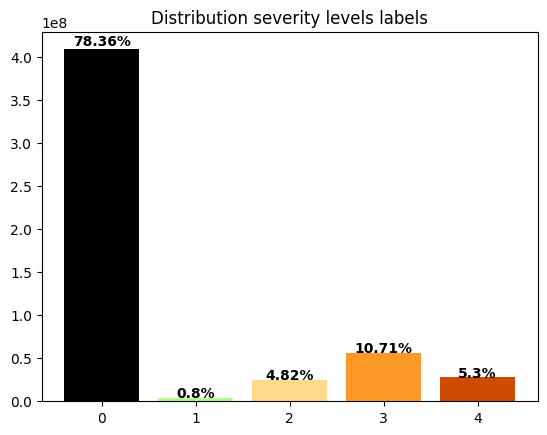

In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

root_folder = "../../data/"
def count_values_in_tiff(path):
    img = np.array(Image.open(path))
    unique, counts = np.unique(img, return_counts=True)
    return dict(zip(unique, counts))

df = pd.read_csv("csv_files/satelliteData.csv")
df = df[ (df["folder"] == "optimal") & (df["GRA"] == 1) & (df["pixelBurned"] > 0)]

tiff_paths = []
for i in range(len(df)):
    # get the file path and number from the dataframe
    emsr_folder_path = df.iloc[i]['folderPath']
    tiif_path = root_folder + emsr_folder_path + "/" + emsr_folder_path.split("/")[-1] + "_GRA.tif"
    if os.path.exists(tiif_path):
        tiff_paths.append(tiif_path)
    else:
        continue

value_counts = []
for path in tiff_paths:
    value_counts.append(count_values_in_tiff(path))

total_counts = {}
for count_dict in value_counts:
    for key, value in count_dict.items():
        if key in total_counts:
            total_counts[key] += value
        else:
            total_counts[key] = value

print(total_counts)
graph = plt.bar(total_counts.keys(), total_counts.values(), color=[(0,0,0),(181/256,254/256,142/256), (254/256,217/256,142/256), (254/256,153/256,41/256), (204/256,76/256,2/256)])
plt.title('Distribution severity levels labels')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((total_counts[i]/sum(total_counts.values()) * 100),2))+'%',
             ha='center',
             weight='bold')
    i+=1

plt.show()

{0: 409280785, 1: 113000094}


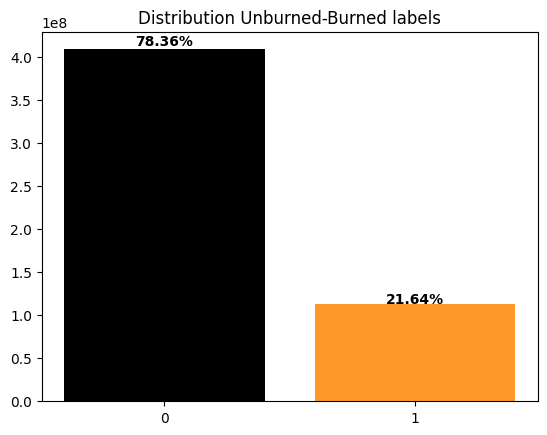

In [22]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

root_folder = "../../data/"
def count_values_in_tiff(path):
    img = np.array(Image.open(path))
    unique, counts = np.unique(img, return_counts=True)
    return dict(zip(unique, counts))

# Iteratively read all TIFF images in the given folder and its subfolders.
tiff_paths = []
for i in range(len(df)):
    # get the file path and number from the dataframe
    emsr_folder_path = df.iloc[i]['folderPath']
    tiif_path = root_folder + emsr_folder_path + "/" + emsr_folder_path.split("/")[-1] + "_DEL.tif"
    if os.path.exists(tiif_path):
        tiff_paths.append(tiif_path)
    else:
        continue

value_counts = []
for path in tiff_paths:
    value_counts.append(count_values_in_tiff(path))

total_counts = {}
for count_dict in value_counts:
    for key, value in count_dict.items():
        if key in total_counts:
            total_counts[key] += value
        else:
            total_counts[key] = value

print(total_counts)
graph = plt.bar(total_counts.keys(), total_counts.values(), color=[(0,0,0), (254/256,153/256,41/256)])
plt.title('Distribution Unburned-Burned labels')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((total_counts[i]/sum(total_counts.values()) * 100),2))+'%',
             ha='center',
             weight='bold')
    i+=1

plt.xticks(list(total_counts.keys()), ['0', '1'])  # This line sets the x labels to 0 and 1
plt.show()